\newpage

1. A classification problem based on the dataset by @misc_chronic_kidney_disease_336 is to classify an individual into has or doesn't have chronic kidney disease based on the following predictor variables: age, blood pressure (mm/Hg), specific gravity, albumin, sugar, red blood cells, pus cell, pus cell clumps, bactera, blood glucose random (mgs/dl), blood urea (mgs/dl), serum creatinine (mgs/dl), sodium (mEq/L), potassium (mEq/L), hemoglobin (gms), packed cell volume, white blood cell count (cells/cmm), red blood cell count (millions/cmm), hypertension, diabetes mellitus, coronary artery disease, appetite, pedal edema, and anemia. 

2. We import the data before and transform as necessary. 

In [24]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import certifi

chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets

data = pd.concat([X, y], axis = 1)


To check if any variable transformations are necessary, we check that the data types of the variables in the dataframe match the description in the data dictionary. 

In [25]:
print(data.dtypes)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object


We can see that age, blood pressure (bp), blood glucose random (bgr), blood urea (bu), serum creatinine (sc), sodium (sod), potassium (pot), hemoglobin (hemo), packed cell volume (pcv), white blood cell count (wbcc), and red blood cell count (rbcc) are all numerical (float) values as they should be according to the data dictionary. However, specific gravity (sg), albumin (al), and sugar (su) should be nominal but are float values. Red blood cells (rbc), pus cell (pc), pus cell clumps (pcc), bacteria (ba), hypertension (htn), diabetes mellitus (dm), coronary artery disease (cad), appette (appet), pedal edema (pe), anemia (ane), and class should all be nominal, instead of object as they appear now. Now we correct the data type errors by converting the noted variables to categorical/nominal.

In [26]:
columns_to_convert = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
for col in columns_to_convert:
    data[col] = pd.Categorical(data[col])
print(data.dtypes)

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object


In order to make the variables match the abbreviations found in the data dictionary, we rename wbcc and rbcc to wc and rc, respectively. 

In [27]:
data = data.rename(columns={'wbcc':'wc'})
data = data.rename(columns={'rbcc':'rc'})
print(data.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


3. We explore the data and give a detailed description of the dataset.

In [28]:
print(data.shape)
print(data.iloc[0:2,0:12])
print(data.iloc[0:2,12:26])

(400, 25)
    age    bp    sg   al   su  rbc      pc         pcc          ba    bgr  \
0  48.0  80.0  1.02  1.0  0.0  NaN  normal  notpresent  notpresent  121.0   
1   7.0  50.0  1.02  4.0  0.0  NaN  normal  notpresent  notpresent    NaN   

     bu   sc  
0  36.0  1.2  
1  18.0  0.8  
   sod  pot  hemo   pcv      wc   rc  htn   dm cad appet  pe ane class
0  NaN  NaN  15.4  44.0  7800.0  5.2  yes  yes  no  good  no  no   ckd
1  NaN  NaN  11.3  38.0  6000.0  NaN   no   no  no  good  no  no   ckd


There are 25 variables in the dataset, with 25 variables and 400 observations. The variables include an individual's age in years, their blood pressue in mm/Hg, their specific gravity, their albumin level, their sugar level, the normality of their red blood cells, the normality of their puss cells, their presence of pus cell clumps, their presence of bacteria, their blood glucose random level in mgs/dl, their blood urea level in mgs/dl, their serum creatinine level in mgs/dl, their sodium level in mEq/L, their potassium level in mEq/L, their hemoglobinl level in gms, their packed cell volume, their white blood cell count in cells/cumm, their red blood cell count in millions/cmm, if they have hypertension, if they have diabetes mellitus, if they have coronary artery disease, if they have a good or poor appertite, if they have pedal edema, if they have anemia, anda if they have chronic kidney diease.

Next we create data summaries, including observation counts.

In [29]:
for col in columns_to_convert:
    print(data[col].value_counts(normalize=True))

data.describe(include = 'all')

sg
1.020    0.300283
1.010    0.237960
1.025    0.229462
1.015    0.212465
1.005    0.019830
Name: proportion, dtype: float64
al
0.0    0.562147
1.0    0.124294
2.0    0.121469
3.0    0.121469
4.0    0.067797
5.0    0.002825
Name: proportion, dtype: float64
su
0.0    0.826211
2.0    0.051282
3.0    0.039886
1.0    0.037037
4.0    0.037037
5.0    0.008547
Name: proportion, dtype: float64
rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64
htn
no     0.630653
yes    0.369347
Name: proportion, dtype: float64
dm
no      0.653266
yes     0.344221
\tno    0.002513
Name: proportion, dtype: float64
cad
no     0.914573
yes    0.085427
Name: proportion, dtype: float64
appet
good    0.794486
poor    0.205514
Name: proportion, dtype

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.00,354.0,351.0,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,5.00,6.0,6.0,2,2,2,2,NaN,...,NaN,NaN,NaN,2,3,2,2,2,2,3
top,NaN,NaN,1.02,0.0,0.0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,106.00,199.0,290.0,201,259,354,374,NaN,...,NaN,NaN,NaN,251,260,364,317,323,339,248
mean,51.483376,76.469072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that all variables have missing values, since no counts equal 400 (except ckd however this has 3 categories when it should have 2, so one is likely N/A). We can see that numerical variables have been properly scaled to have a mean of approximately zero and a standard deviation of approximately one. From the proportion counts of categorical variables, we can see that all categories are represented however some are severely under-represented. We explore this finding more through histograms.

Next we re-examine the data types

In [30]:
data.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc      category
pc       category
pcc      category
ba       category
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wc        float64
rc        float64
htn      category
dm       category
cad      category
appet    category
pe       category
ane      category
class    category
dtype: object

The data types of only category (nominal) or numerical, as we previously transformed them to be such.

Finally, we look at variables' distributions.

c:\Users\seeba\OneDrive - McMaster University\Desktop\Fourth Year\STATS 3DA3\Assignment 6\3DA3-Asgmt-6\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


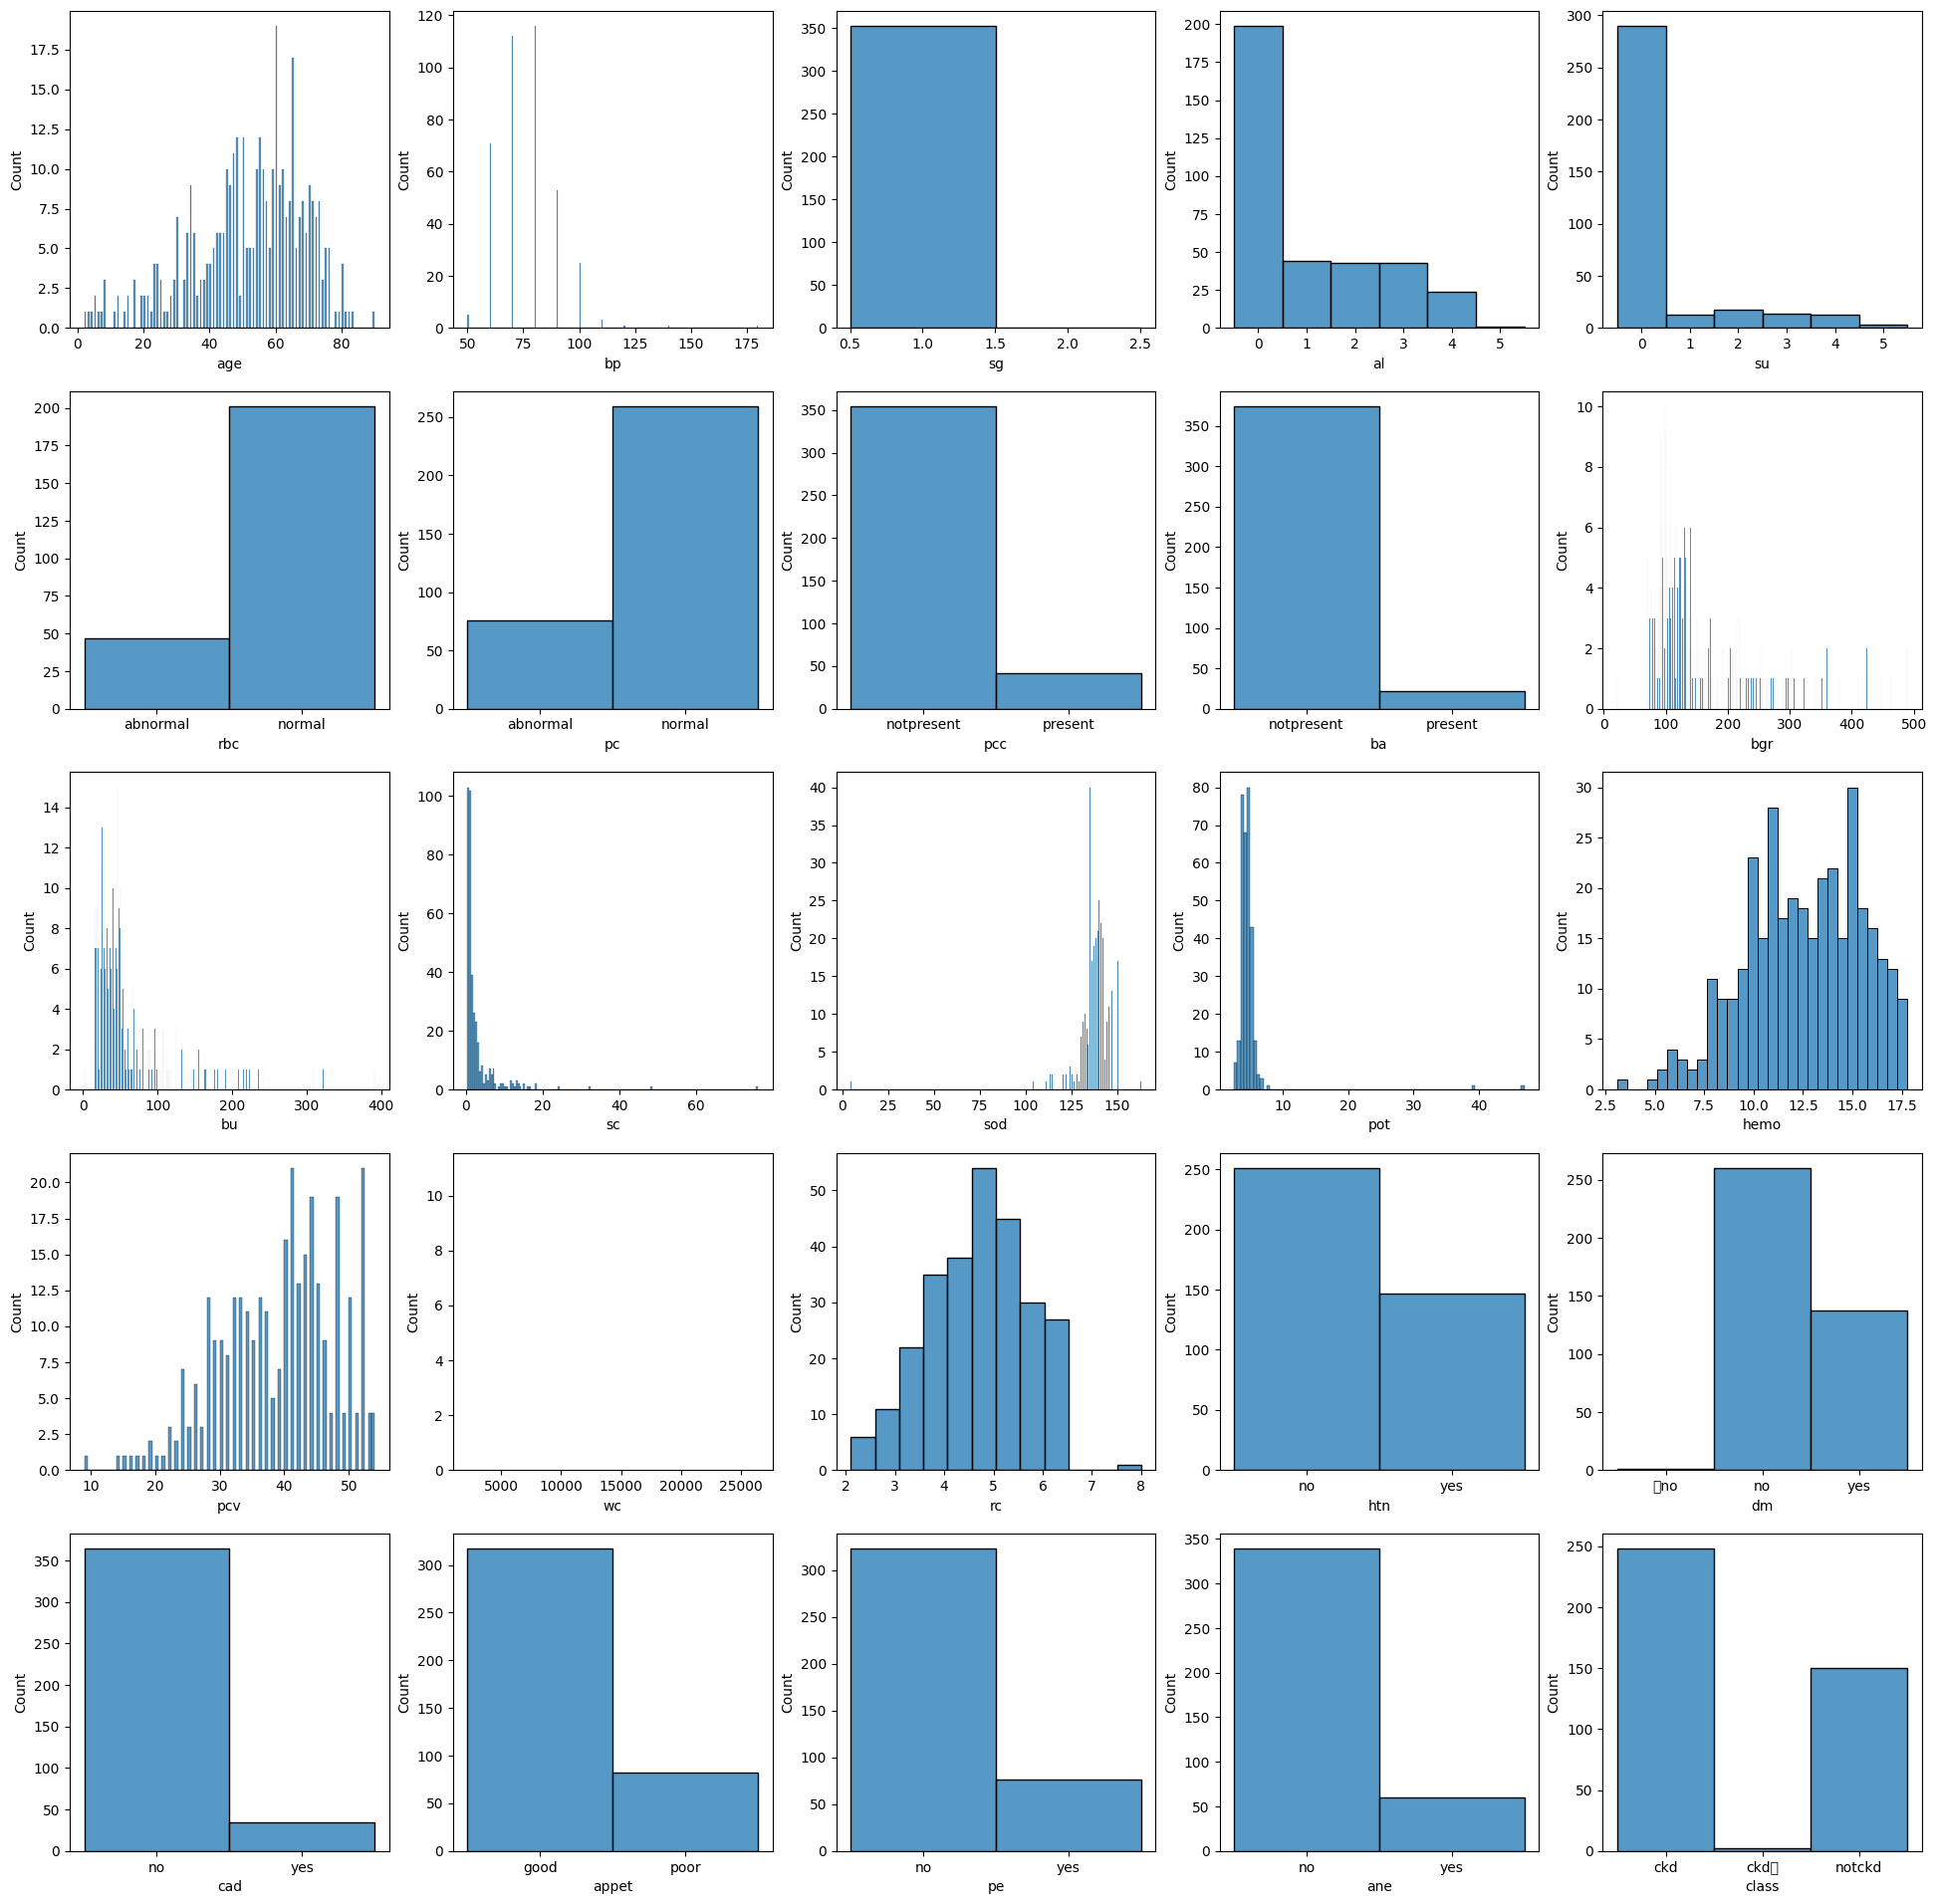

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
figure, axes = plt.subplots(5,5, sharex= False, figsize=(24,24))
col = data.columns
k = 0
for i in range(5):
    for j in range(5):
        sns.histplot(ax = axes[i,j], data=data, x = str(col[k]), binwidth=0.5)
        k = k+1
plt.show()

We notice most categorical variables are heavily skewed. For example, hypertension, diabetes mellitus, coronary artery disease, appetite, pedal edema, and anemia all have many more instances of "no" than "yes". Red blood cells and pus cell display similar trends where by "normal" is more frequent than "abnormal". Pus cell clumps and bacteria also display this trend where "present" is far less frequent than "not present". It is important to not that class (ckd, notckd) does not display this heavt skew. Although "ckd" is more frequent than "notckd", the two are relatively even.

4. We now analyze variable relationships. We start by using a pair plot to check for relationships between numerical variables.

<Axes: >

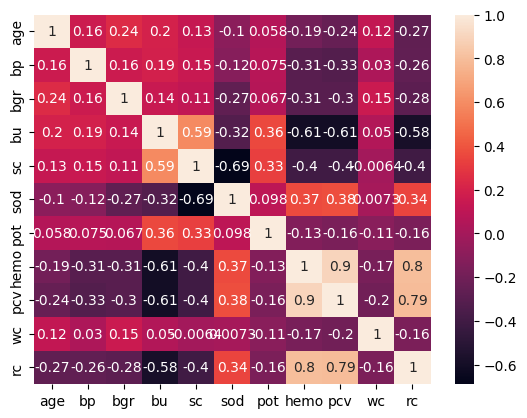

In [32]:
num_col = data.select_dtypes(include = 'float64').columns
sns.heatmap(data[num_col].corr(), annot=True)

From this heatmap we can see hemoglobin and packed cell volume, hemoglobin and red blood cell count, and packed cell volume and red blood cell count have a high positive correlation (>0.75). Conversely, sodium and serum creatinine, hemoglobin and blood urea, and packed cell volume and blood urea have a high negative correlation (<-0.6). The least correlated variables are white blood cell count and serum creatinine (0.0064).

5. We remove observations with missing values in order to conduct subgroup analysis.

In [33]:
data_ex = data.dropna(ignore_index=True) # drop observations


6. We do not conduct outlier analysis. This is because outliers can be very important in diagnosising diseases in health data. By removing outliers, we would miss the opportunity to see how extreme values can help in finding disease risks.

7. We now conduct using K-means clustering on numerical data, after scaling.

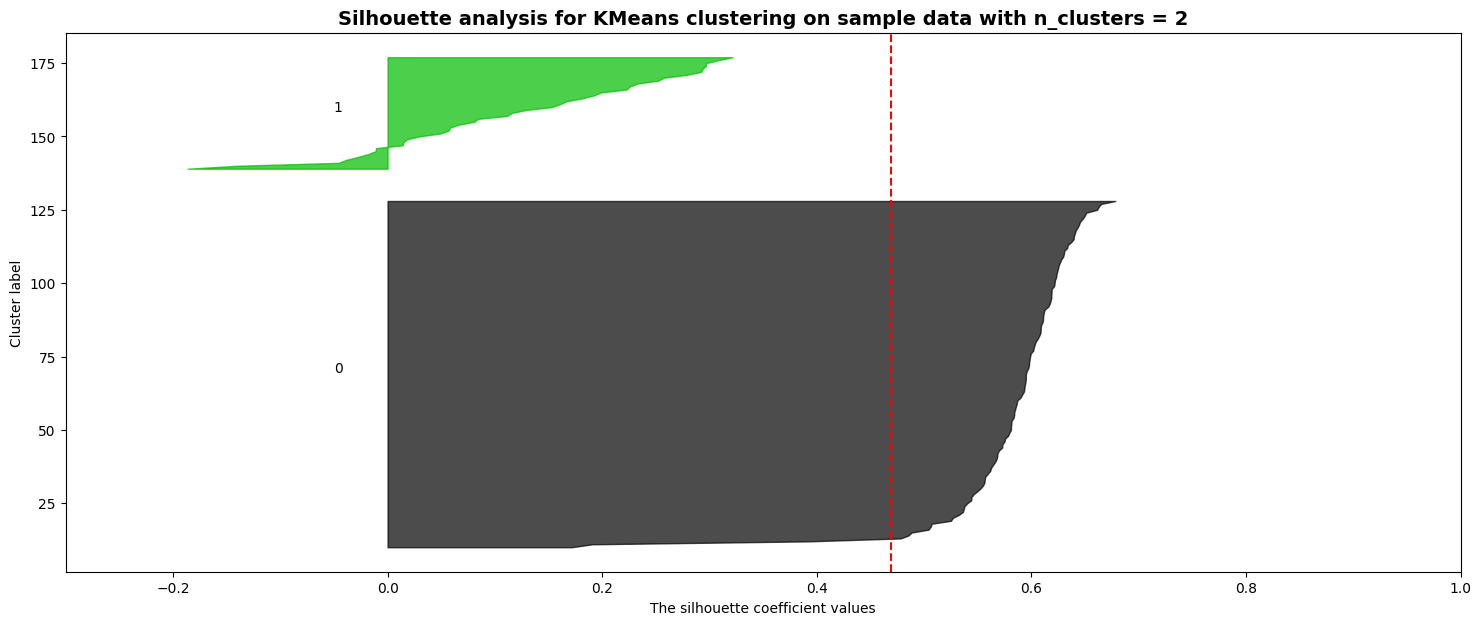

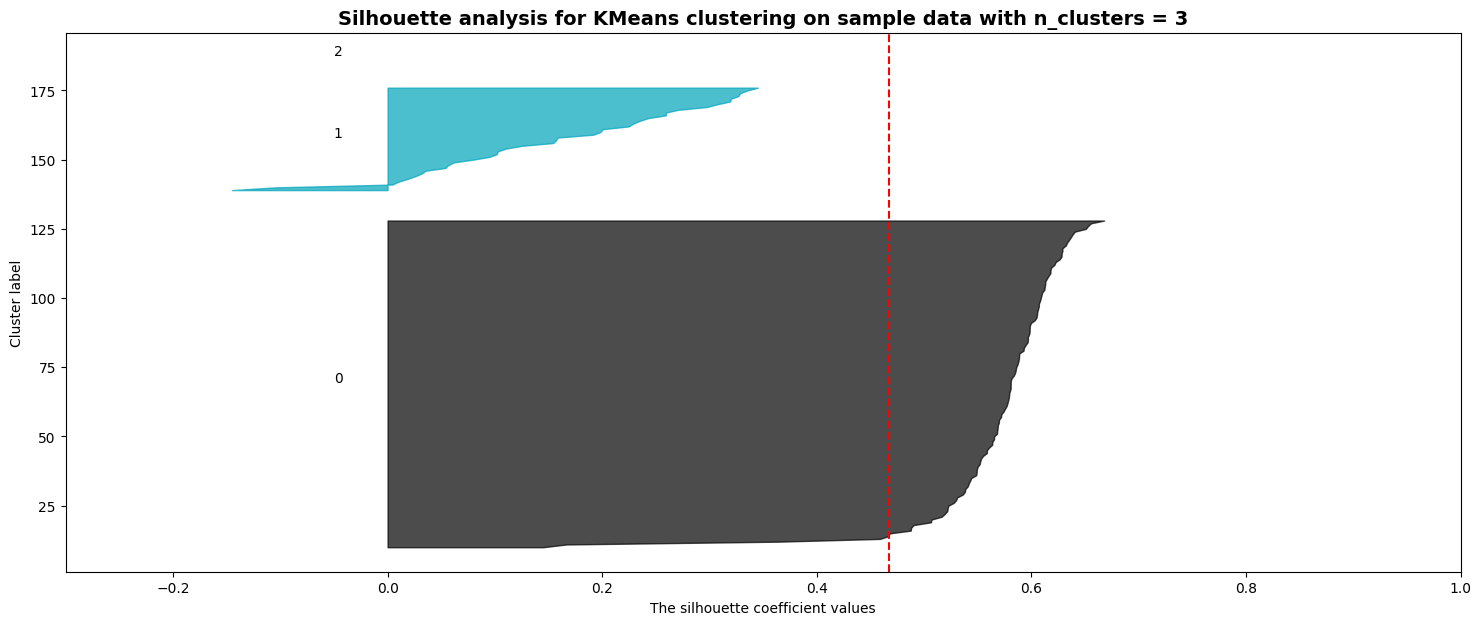

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import scale

num_ex = pd.DataFrame(scale(data_ex[num_col]))
range_n_clusters = [2, 3]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(num_ex)
    # average silhouette score
    silhouette_avg_km = silhouette_score(num_ex, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(num_ex, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next cluster silhouette scores
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

There appears to be two subgroups, we now visualize them using PCA with two PCs. 

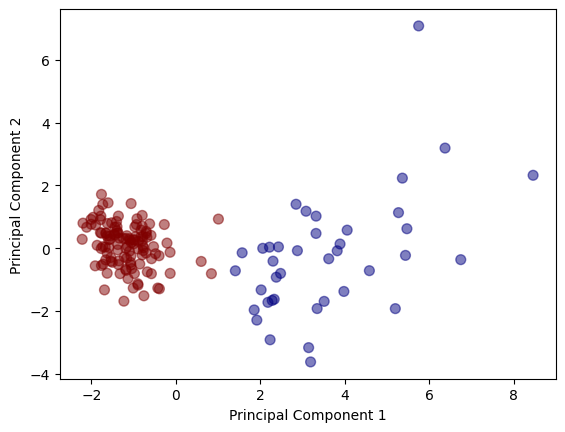

In [35]:
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(num_ex)
cluster_labels_km1 = km1.fit_predict(num_ex)
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
pca = PCA()
pc_scores = pd.DataFrame(pca.fit_transform(num_ex), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8', 'PC9','PC10', 'PC11'], index=num_ex.index)

color_idx = pd.factorize(cluster_labels_km1)[0]
cmap = plt.cm.jet
scatter = plt.scatter(pc_scores.iloc[:,0], pc_scores.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.show()

From this analysis, we can see there are very clearly one defined sub-group based on the numerical variables. 

8. We now split the data into a 70/30 training/test split for testing, using a random seed of 1 and stratified sampling.

In [40]:
from sklearn.model_selection import train_test_split
y = data_ex['class']
x = data_ex.drop('class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.3, random_state=1, stratify=y)

\newpage

9. We choose two classifiers to address the classification problem. First we use k-nearest neighbours (KNN) then we use a decision tree. We choose this classifiers as they are interpretable. Also, classic k-nearest neighbours is used for numerical variables only while decision trees can handle mixed variable types, allowing us to see how including categorical variables can affect performance.

10. For KNN, we use the accuracy/test error metrics and for decision tree we use the classification accuracy. Using these two metrics we can compare the classifiers.

11. We use lasso regression to determine important features for KNN while decision trees automatically perform feature selection.

In [41]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=1500)
lasso_cv.fit(X_train[num_col], y_train)
lasso_cv.alpha_

ValueError: could not convert string to float: 'notckd'

## Bibliography